# Detectron2 Detect Chess Detection

![](https://www.kaggleusercontent.com/kf/31432124/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..ItG1ZBG8pDX64qXwRigYFA.E0Q8hYB_ogbIArn0lLlj6rAyKyB3ST-1b4j5CoStpKxZICZFggefAkPeuB5s51Oket_StaCQ7MKBmL2-e2VcE4CTxsheqTJXNKW5VV0QAI3cYoTMr6RVs5BytYset3NW03bQ0VTZAxv2rGM6pZzOkv_LiOF4JWSfkOOiPZoiolNZhvppo1lWrAY7uY3uby92rKwniWuqwhTKJHZ0m2HVeQXwuVYOaVPqbR2vLCzgjRCKDs06sfb29F3I8ei0lo-kICmQ2PaWBUcviZBcm1cvK_zHdyk-6fCqQFHUhptPGJSGqrfb4oxh0uGH2MRioS3IoNXNaXkdN8IoeWOhHljw3UGSl8S1oo-mFs52U9Z61ebZKENbTq0PF8rFEhw5kGX_9jcl6M0uqijvuykl8qJtkVPfHUgin-j0SgZZ4NmLxxDwTe4WDTgJNScw9WOuL-osvkMs4E24swyQ322Hu52eeQSVWoIMC0TPznemgnkf2olKXSkOnv0MNgX7JYL9u0jaybhwJ3BF19nEwiO1xFQdp7TBKRZ6reC_BdNjBx6WGgKVblpS_o0GiTFreNouXEVkHmzZeeusBJd9rtTmHN_t_fRuNaJ17vxvnMHv3DlJLb18kQ3PHQDoOHqvp8yIx45M_BFcN40i-8ipgBaaBiYxd4fsX3haD9xIzi7OcejCeJs.zMaxqcYltMYR59gJVAA_wA/__results___files/__results___10_1.png)

<table align="left"><td>
  <a target="_blank"  href="https://colab.research.google.com/github/TannerGilbert/Object-Detection-and-Image-Segmentation-with-Detectron2/blob/master/Detectron2_Detect_Chess_Detection.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab
  </a>
</td><td>
  <a target="_blank"  href="https://github.com/TannerGilbert/Object-Detection-and-Image-Segmentation-with-Detectron2/blob/master/Detectron2_Detect_Chess_Detection.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
</td></table>

## Install detectron2

> **Important**: If you're running on a local machine, be sure to follow the [installation instructions](https://github.com/facebookresearch/detectron2/blob/master/INSTALL.md). This notebook includes only what's necessary to run in Colab.

In [ ]:
!pip install pyyaml==5.1

import torch
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
# Install detectron2 that matches the above pytorch version
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/$CUDA_VERSION/torch$TORCH_VERSION/index.html
# If there is not yet a detectron2 release that matches the given torch + CUDA version, you need to install a different pytorch.

# exit(0)  # After installation, you may need to "restart runtime" in Colab. This line can also restart runtime

## Get data

In [2]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

Before we can start training our model we need to download our data-set. In this case we will use my microcontroller detection data-set, which is [available on Kaggle](https://www.kaggle.com/tannergi/microcontroller-detection).

In [3]:
# Install Kaggle API
!pip install -q kaggle
!pip install -q kaggle-cli

     |████████████████████████████████| 74 kB 2.9 MB/s 
     |████████████████████████████████| 4.2 MB 42.5 MB/s 
     |████████████████████████████████| 111 kB 69.3 MB/s 
     |████████████████████████████████| 141 kB 69.8 MB/s 
     |████████████████████████████████| 49 kB 8.2 MB/s 
  ERROR: Failed building wheel for lxml
    Running setup.py install for lxml ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-6f38wun_/lxml_d66f09ac4f4642de9b0f9abdf6e4de55/setup.py'"'"'; __file__='"'"'/tmp/pip-install-6f38wun_/lxml_d66f09ac4f4642de9b0f9abdf6e4de55/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-26nk_rlf/install-record.txt --s

If you are working in Colab you need to add the username and key contained in your kaggle.json file to your environment using os.

In [4]:
# only for google colab
import os
os.environ['KAGGLE_USERNAME'] = "<username>" 
os.environ['KAGGLE_KEY'] = "<key>"

In [5]:
!kaggle datasets download -d tannergi/chess-piece-detection

 98% 162M/166M [00:01<00:00, 95.3MB/s]
100% 166M/166M [00:01<00:00, 88.3MB/s]


In [6]:
!unzip chess-piece-detection.zip

Archive:  chess-piece-detection.zip
  inflating: Chess Detection/annotations/IMG_1989.xml  
  inflating: Chess Detection/annotations/IMG_1990.xml  
  inflating: Chess Detection/annotations/IMG_1991.xml  
  inflating: Chess Detection/annotations/IMG_1992.xml  
  inflating: Chess Detection/annotations/IMG_1993.xml  
  inflating: Chess Detection/annotations/IMG_1994.xml  
  inflating: Chess Detection/annotations/IMG_1995.xml  
  inflating: Chess Detection/annotations/IMG_1996.xml  
  inflating: Chess Detection/annotations/IMG_1997.xml  
  inflating: Chess Detection/annotations/IMG_1998.xml  
  inflating: Chess Detection/annotations/IMG_1999.xml  
  inflating: Chess Detection/annotations/IMG_2000.xml  
  inflating: Chess Detection/annotations/IMG_2001.xml  
  inflating: Chess Detection/annotations/IMG_2002.xml  
  inflating: Chess Detection/annotations/IMG_2003.xml  
  inflating: Chess Detection/annotations/IMG_2004.xml  
  inflating: Chess Detection/annotations/IMG_2005.xml  
  inflating:

## Register data-set

In order to use a dataset with Detectron2 we need to register it. For more information check out the [official documentation](https://detectron2.readthedocs.io/tutorials/datasets.html#register-a-dataset).

In [7]:
import os
import numpy as np
import json
from detectron2.structures import BoxMode
import itertools
import cv2
import xml.etree.ElementTree as ET


# write a function that loads the dataset into detectron2's standard format
def get_dataset_dicts(annotation_path, image_path):
    classes = ['white-rook', 'white-knight', 'white-bishop', 'white-king', 'white-queen', 'white-pawn', 'black-rook', 'black-knight', 'black-bishop', 'black-king', 'black-queen', 'black-pawn']

    dataset_dicts = []
    for idx, filename in enumerate(os.listdir(annotation_path)):
        record = {}
        root = ET.parse(os.path.join(annotation_path, filename)).getroot()
        record["file_name"] = os.path.join(image_path, root.find('filename').text)
        record["height"] = 2248
        record["width"] = 4000

        objs = []
        for member in root.findall('object'):
          obj = {
              'bbox': [int(member[4][0].text), int(member[4][1].text), int(member[4][2].text), int(member[4][3].text)],
              'bbox_mode': BoxMode.XYXY_ABS,
              'category_id': classes.index(member[0].text),
              "iscrowd": 0
          }
          objs.append(obj)
        record["annotations"] = objs
        dataset_dicts.append(record)
    return dataset_dicts

In [8]:
from detectron2.data import DatasetCatalog, MetadataCatalog

classes = ['white-rook', 'white-knight', 'white-bishop', 'white-king', 'white-queen', 'white-pawn', 'black-rook', 'black-knight', 'black-bishop', 'black-king', 'black-queen', 'black-pawn']

DatasetCatalog.register('chess_piece_dataset', lambda: get_dataset_dicts('Chess Detection/annotations', 'Chess Detection/images'))
MetadataCatalog.get('chess_piece_dataset').set(thing_classes=classes)
chess_metadata = MetadataCatalog.get('chess_piece_dataset')

We can check if our code works correctly by plotting a few images.

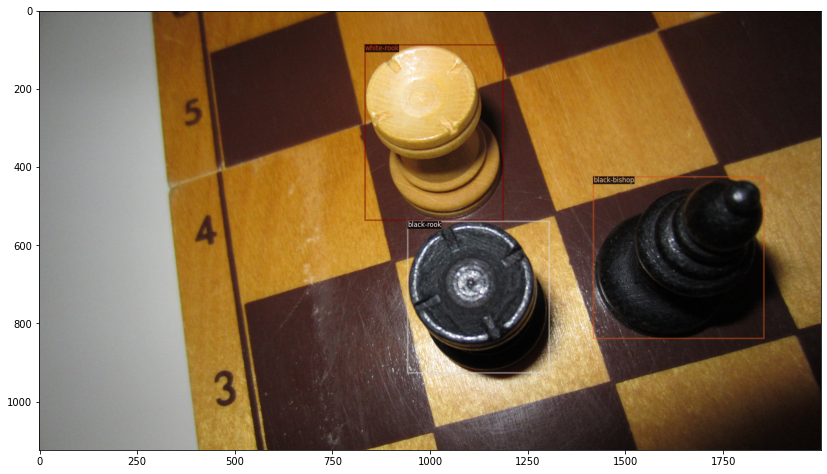

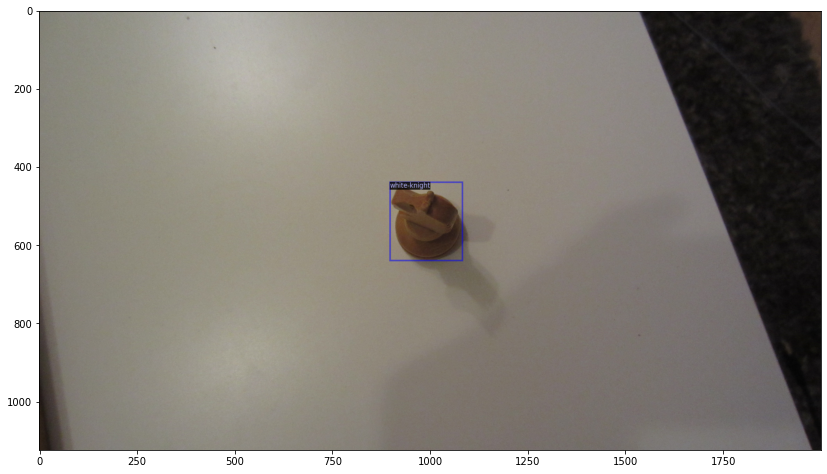

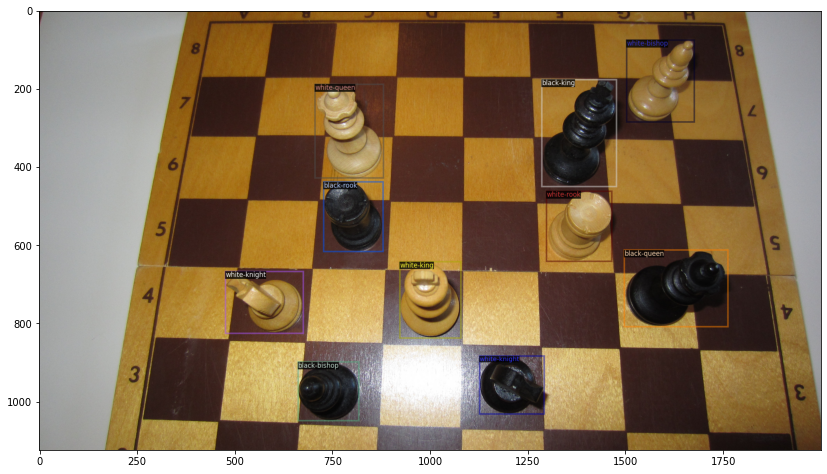

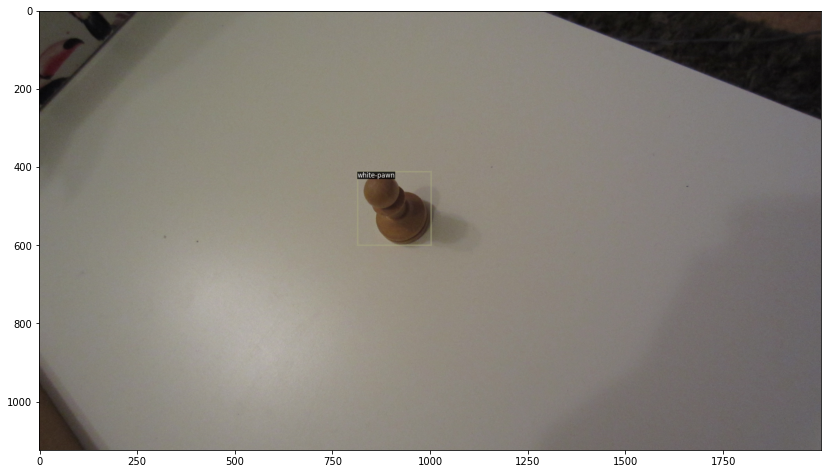

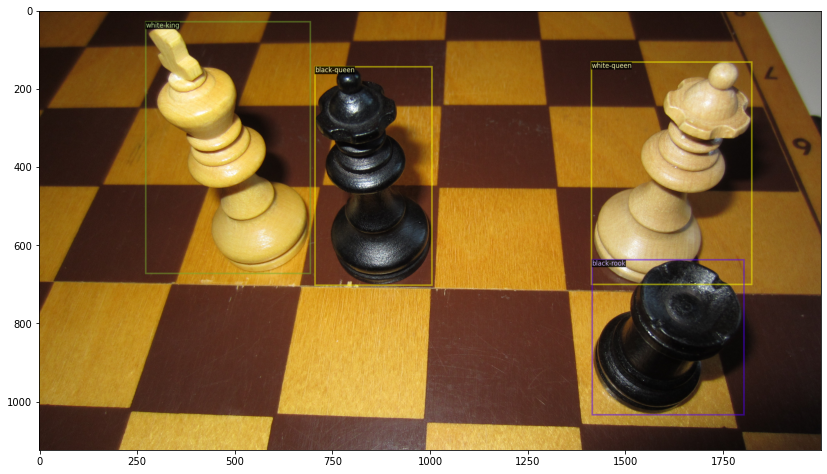

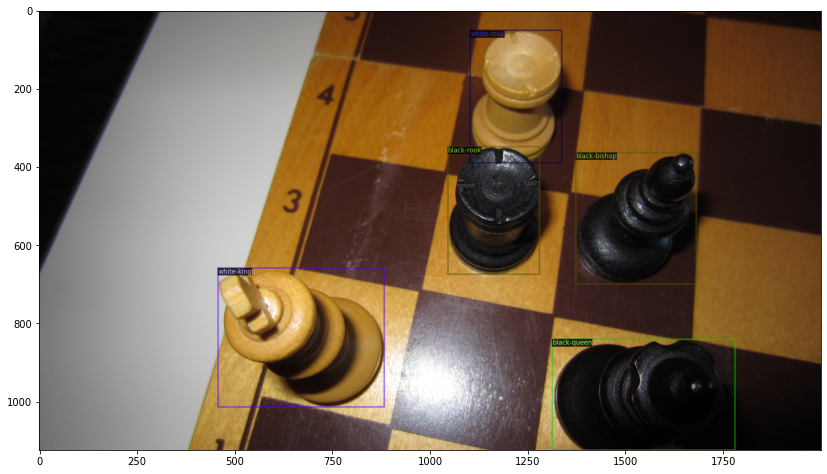

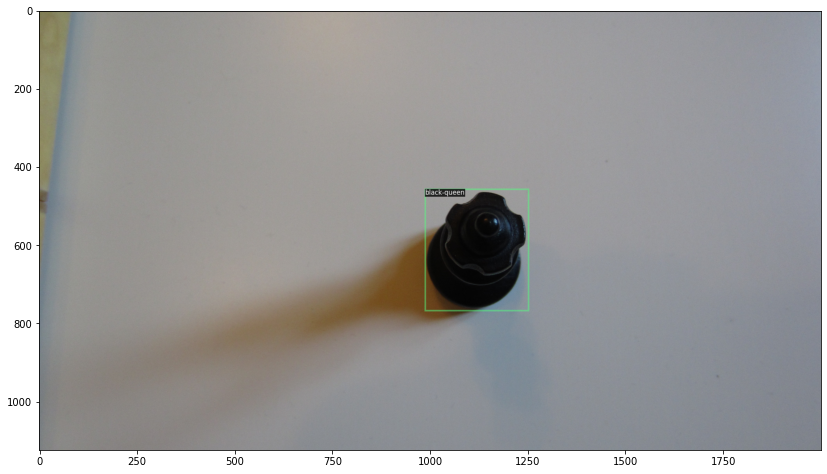

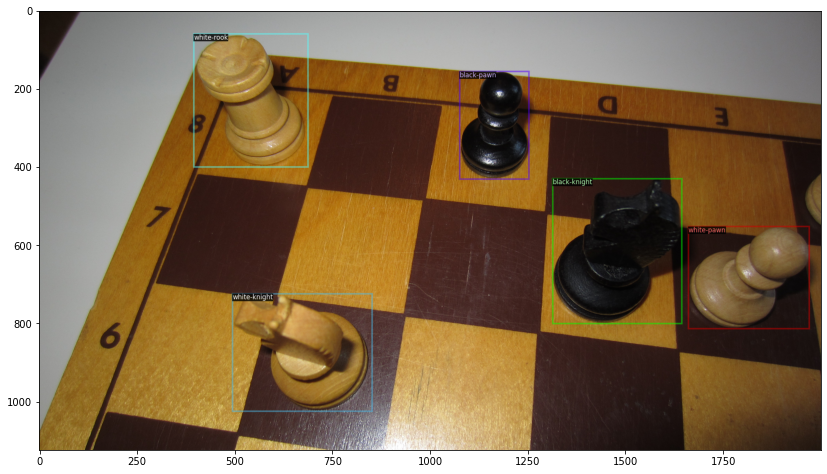

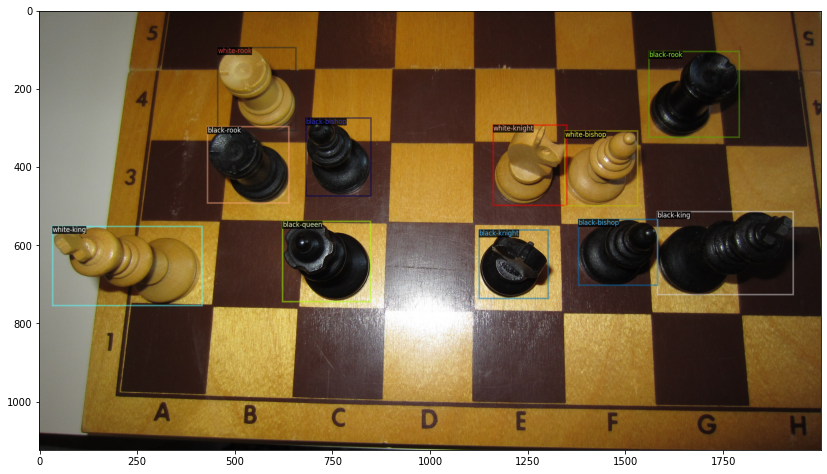

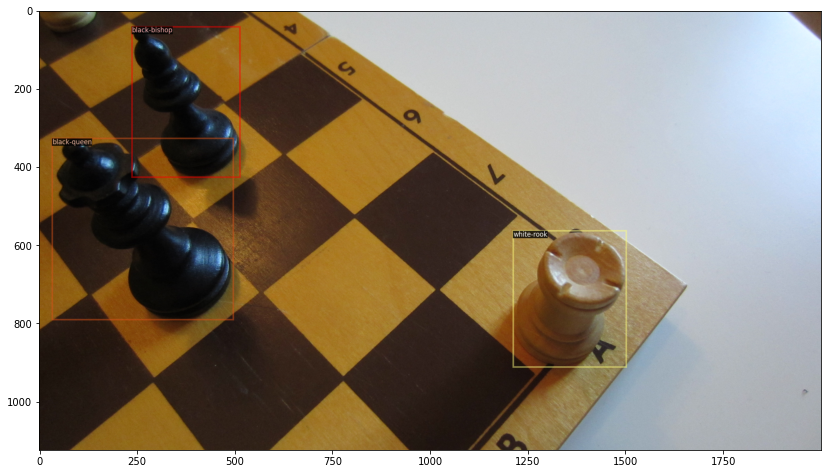

In [9]:
import random
from detectron2.utils.visualizer import Visualizer

dataset_dicts = DatasetCatalog.get('chess_piece_dataset')
for d in random.sample(dataset_dicts, 10):
    img = cv2.imread(d["file_name"])
    v = Visualizer(img[:, :, ::-1], metadata=chess_metadata, scale=0.5)
    v = v.draw_dataset_dict(d)
    plt.figure(figsize = (14, 10))
    plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    plt.show()

## Train model

In [10]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ('chess_piece_dataset',)
cfg.DATASETS.TEST = ()   # no metrics implemented for this dataset
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.MAX_ITER = 1000
cfg.SOLVER.STEPS = []        # do not decay learning rate
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 12

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[08/13 07:51:13 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f6e8b1.pkl: 243MB [00:04, 53.1MB/s]                           
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (13, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (13,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (48, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (48,) in the model! You might want to double check if this is expected.
Some model parameters or buffers are not found in the checkpoint:
roi_heads.box

[08/13 07:51:19 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[08/13 07:51:37 d2.utils.events]:  eta: 0:13:34  iter: 19  total_loss: 2.006  loss_cls: 1.652  loss_box_reg: 0.4645  loss_rpn_cls: 0.004991  loss_rpn_loc: 0.007416  time: 0.8459  data_time: 0.1316  lr: 0.00039962  max_mem: 3664M
[08/13 07:51:53 d2.utils.events]:  eta: 0:12:59  iter: 39  total_loss: 1.084  loss_cls: 0.5465  loss_box_reg: 0.5186  loss_rpn_cls: 0.001547  loss_rpn_loc: 0.01092  time: 0.8177  data_time: 0.0549  lr: 0.00079922  max_mem: 3664M
[08/13 07:52:09 d2.utils.events]:  eta: 0:12:41  iter: 59  total_loss: 0.921  loss_cls: 0.4113  loss_box_reg: 0.4891  loss_rpn_cls: 0.0006594  loss_rpn_loc: 0.004707  time: 0.8111  data_time: 0.0579  lr: 0.0011988  max_mem: 3664M
[08/13 07:52:26 d2.utils.events]:  eta: 0:12:27  iter: 79  total_loss: 0.9891  loss_cls: 0.4473  loss_box_reg: 0.5292  loss_rpn_cls: 0.0002034  loss_rpn_loc: 0.01071  time: 0.8131  data_time: 0.0750  lr: 0.0015984  max_mem: 3665M
[08/13 07:52:43 d2.utils.events]:  eta: 0:12:17  iter: 99  total_loss: 0.7354  los

## Use model for inference

Now, we can perform inference on our validation set by creating a predictor object.

In [11]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set the testing threshold for this model
cfg.DATASETS.TEST = ("chess_piece_dataset", )
predictor = DefaultPredictor(cfg)

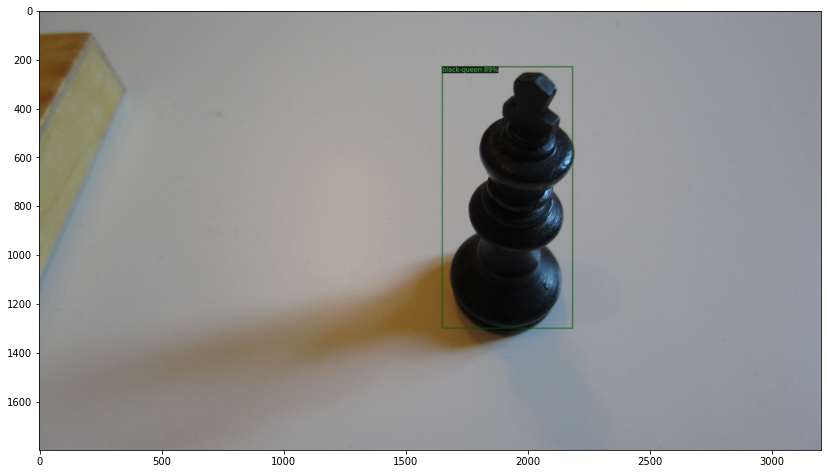

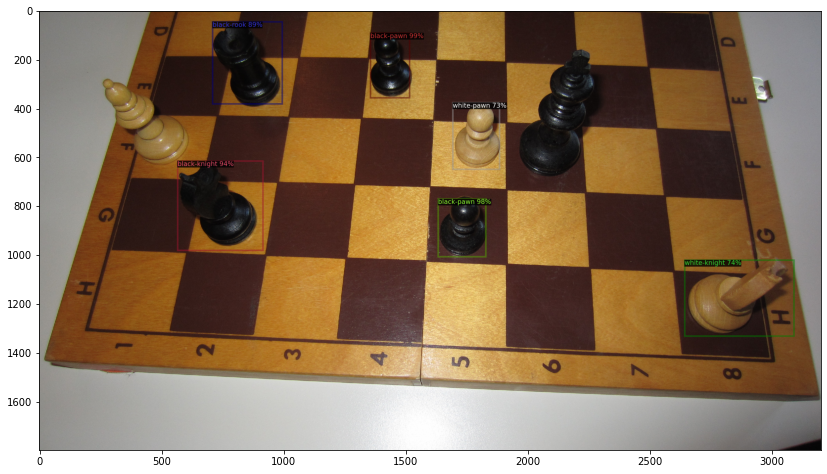

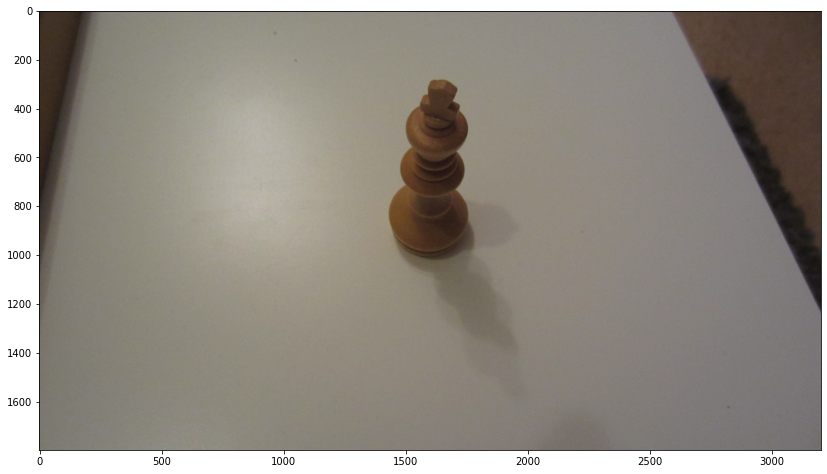

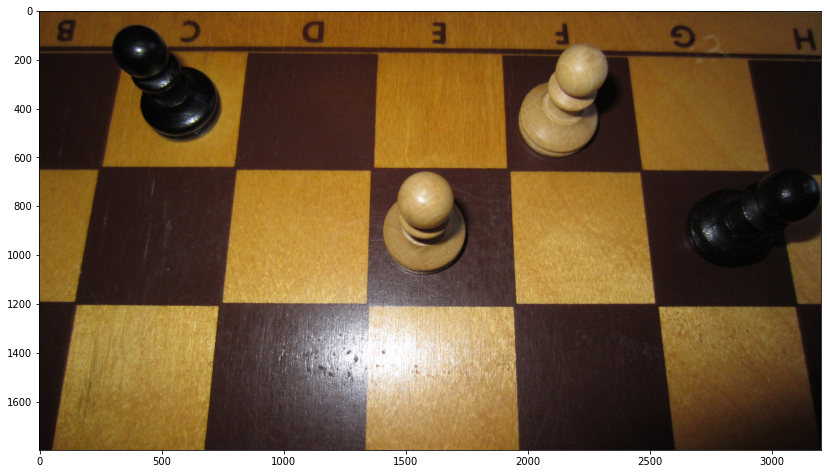

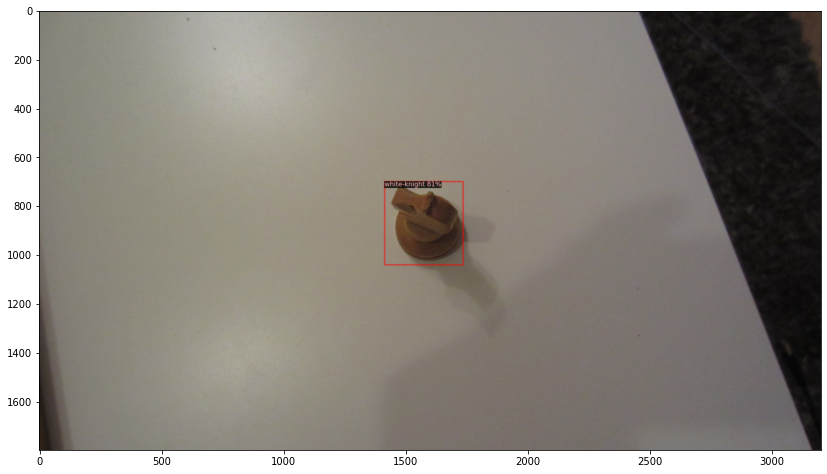

In [12]:
from detectron2.utils.visualizer import ColorMode
import random

dataset_dicts = DatasetCatalog.get('chess_piece_dataset')
for d in random.sample(dataset_dicts, 5):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1], metadata=chess_metadata, scale=0.8)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.figure(figsize = (14, 10))
    plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    plt.show()